<a href="https://colab.research.google.com/github/Haider-q/Deep-Learning-Assignments/blob/main/Ionosphere_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Encode labels.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

data = pd.read_csv("/content/ionosphere_data.txt")

In [96]:
data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [97]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
feature1,351.0,0.891738,0.311155,0.0,1.000000,1.00000,1.000000,1.0
feature2,351.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0
feature3,351.0,0.641342,0.497708,-1.0,0.472135,0.87111,1.000000,1.0
feature4,351.0,0.044372,0.441435,-1.0,-0.064735,0.01631,0.194185,1.0
feature5,351.0,0.601068,0.519862,-1.0,0.412660,0.80920,1.000000,1.0
feature6,351.0,0.115889,0.460810,-1.0,-0.024795,0.02280,0.334655,1.0
feature7,351.0,0.550095,0.492654,-1.0,0.211310,0.72873,0.969240,1.0
feature8,351.0,0.119360,0.520750,-1.0,-0.054840,0.01471,0.445675,1.0
feature9,351.0,0.511848,0.507066,-1.0,0.087110,0.68421,0.953240,1.0
feature10,351.0,0.181345,0.483851,-1.0,-0.048075,0.01829,0.534195,1.0


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

In [99]:
for feature in data:
    print(feature)
    print(len(data[feature].unique()))

feature1
2
feature2
1
feature3
219
feature4
269
feature5
204
feature6
259
feature7
231
feature8
260
feature9
244
feature10
267
feature11
246
feature12
269
feature13
238
feature14
266
feature15
234
feature16
270
feature17
254
feature18
280
feature19
254
feature20
266
feature21
248
feature22
265
feature23
248
feature24
264
feature25
256
feature26
273
feature27
256
feature28
281
feature29
244
feature30
266
feature31
243
feature32
263
feature33
245
feature34
263
label
2


In [100]:
data['feature2'].unique()

array([0])

In [101]:
data.drop(data.columns[1], inplace=True, axis=1)

In [102]:
data.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [103]:
data.isnull().sum()

feature1     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [104]:
data['label'] = [1 if lbl == 'g' else 0 for lbl in data['label']]

In [105]:
train_data = data.sample(frac= 0.6, random_state=125)
test_data = data.drop(train_data.index)

In [106]:
train_label = train_data.iloc[:,-1]
train_data = train_data.iloc[:,0:-1]
test_label = test_data.iloc[:,-1]
test_data = test_data.iloc[:,0:-1]

In [107]:
data.drop(columns= 'label', inplace = True)

In [73]:
train_data.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
270,1,1.00000,0.08013,0.96775,-0.00482,0.96683,-0.00722,0.87980,-0.03923,1.00000,0.01419,0.96186,-0.01436,0.95947,-0.01671,0.98497,0.01002,0.91152,-0.08848,0.95016,-0.02364,0.94636,-0.02591,0.98164,0.02003,0.93772,-0.03034,1.00000,-0.05843,0.92774,-0.03464,0.92226,-0.03673
116,1,1.00000,-0.14754,1.00000,0.04918,0.57377,-0.01639,0.65574,0.01639,0.85246,-0.03279,0.72131,0.00000,0.68852,-0.16393,0.19672,-0.14754,0.65558,-0.17176,0.67213,0.03279,1.00000,-0.29508,0.31148,-0.34426,0.52385,-0.20325,0.32787,-0.03279,0.27869,-0.44262,0.49180,-0.06557
135,1,0.89706,0.38235,0.91176,0.37500,0.74265,0.67647,0.45588,0.77941,0.19118,0.88971,-0.02206,0.86029,-0.20588,0.82353,-0.37500,0.67647,-0.50000,0.47794,-0.73529,0.38235,-0.86029,0.08824,-0.74265,-0.12500,-0.67925,-0.24131,-0.55147,-0.42647,-0.44118,-0.50735,-0.28676,-0.56618
91,1,0.84557,-0.08580,-0.31745,-0.80553,-0.08961,-0.56435,0.80648,0.04576,0.89514,-0.00763,-0.18494,0.63966,-0.20019,-0.68065,0.85701,-0.11344,0.77979,-0.15729,-0.06959,0.50810,-0.34128,0.80934,0.78932,-0.03718,0.70882,-0.25288,0.77884,-0.14109,-0.21354,-0.78170,-0.18494,-0.59867
100,1,1.00000,-1.00000,0.00000,0.00000,0.77941,-0.99265,0.80882,0.55147,-0.41912,-0.94853,0.00000,0.00000,0.00000,0.00000,0.72059,-0.77206,0.73529,-0.60294,0.00000,0.00000,0.18382,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,1.00000,-1.00000,1.00000,-1.00000,0.00000,0.00000


In [74]:
train_label

270    1
116    0
135    1
91     0
100    0
      ..
213    1
161    1
141    1
59     0
113    1
Name: label, Length: 211, dtype: int64

In [75]:
test_label

4      1
6      1
7      0
9      0
10     1
      ..
337    1
339    1
343    1
346    1
349    1
Name: label, Length: 140, dtype: int64

In [76]:
test_data.shape

(140, 33)

In [77]:
train_label.shape

(211,)

In [108]:
train_data = train_data.to_numpy()
train_label = train_label.to_numpy().astype('float32')
test_data = test_data.to_numpy()
test_label = test_label.to_numpy().astype('float32')

In [79]:
print(type(train_data))
print(type(train_label))
print(type(test_data))
print(type(test_label))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [80]:
print(train_data.dtype)
print(train_label.dtype)
print(test_label.dtype)
print(test_data.dtype)

float64
float32
float32
float64


In [109]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(train_data.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,  activation='sigmoid'))

In [82]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               4352      
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


In [110]:
from tensorflow.keras import optimizers

model.compile(optimizer = 'RMSprop', loss='binary_crossentropy', metrics=['accuracy'])

In [84]:
history = model.fit(train_data, train_label, validation_split=0.25, epochs= 75, batch_size = 32)

Epoch 1/75
5/5 [==============================] - 1s 53ms/step - loss: 0.7367 - accuracy: 0.4232 - val_loss: 0.5594 - val_accuracy: 0.8302
Epoch 2/75
5/5 [==============================] - 0s 12ms/step - loss: 0.5682 - accuracy: 0.7800 - val_loss: 0.4782 - val_accuracy: 0.8302
Epoch 3/75
5/5 [==============================] - 0s 17ms/step - loss: 0.4621 - accuracy: 0.8507 - val_loss: 0.4231 - val_accuracy: 0.8679
Epoch 4/75
5/5 [==============================] - 0s 11ms/step - loss: 0.4204 - accuracy: 0.8804 - val_loss: 0.3874 - val_accuracy: 0.8868
Epoch 5/75
5/5 [==============================] - 0s 12ms/step - loss: 0.3816 - accuracy: 0.8601 - val_loss: 0.3614 - val_accuracy: 0.9245
Epoch 6/75
5/5 [==============================] - 0s 12ms/step - loss: 0.3507 - accuracy: 0.8727 - val_loss: 0.3317 - val_accuracy: 0.9434
Epoch 7/75
5/5 [==============================] - 0s 12ms/step - loss: 0.3281 - accuracy: 0.9036 - val_loss: 0.3070 - val_accuracy: 0.9434
Epoch 8/75
5/5 [===========

In [85]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

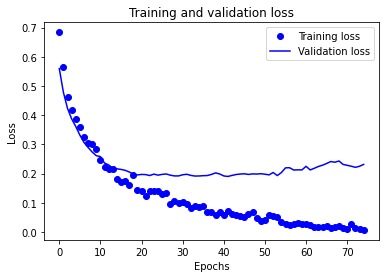

In [86]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(75)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

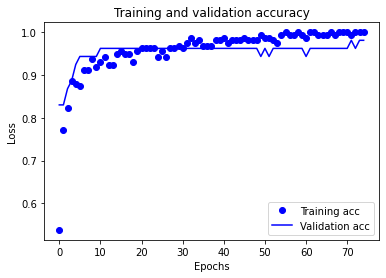

In [87]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [88]:
score = model.evaluate(test_data, test_label)

5/5 [==============================] - 0s 3ms/step - loss: 0.2819 - accuracy: 0.9357


In [89]:
score

[0.2819362282752991, 0.9357143044471741]

In [90]:
predictions=model.predict(test_data)

In [91]:
y_pred = (predictions > 0.5)

In [92]:
tf.math.confusion_matrix(
    test_label, y_pred, num_classes=2, weights=None, dtype=tf.dtypes.int32,
    name=None)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[47,  8],
       [ 1, 84]], dtype=int32)>

In [93]:
np.count_nonzero(y_pred)

92